<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/bdm/Theboys/Theboys_Assignment7_Dask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Theboys - Assignment 7 Dask
1. Pang Chern Hong | MCS231006
2. Nian Cong    | MCS231007
3. Wu Jiaming    | MCS221033
4. Liu Kaiyuan   | MCS231020

Dataset link:https://www.kaggle.com/datasets/forgemaster/steam-reviews-dataset?select=reviews-1230-2345.csv

In [ ]:
# Upload kaggle.json API token, and download / unzip steam reviews dataset

# Install and upload the kaggle.json file
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d forgemaster/steam-reviews-dataset
!unzip steam-reviews-dataset.zip


Saving kaggle.json to kaggle.json
 99% 1.92G/1.93G [00:22<00:00, 126MB/s]
100% 1.93G/1.93G [00:22<00:00, 91.2MB/s]
Archive:  steam-reviews-dataset.zip
  inflating: reviews-1-115.csv       
  inflating: reviews-11265-13495.csv  
  inflating: reviews-115-1230.csv    
  inflating: reviews-1230-2345.csv   
  inflating: reviews-13495-13500.csv  
  inflating: reviews-13500-13537.csv  
  inflating: reviews-13537-27075.csv  
  inflating: reviews-2345-4575.csv   
  inflating: reviews-4575-6805.csv   
  inflating: reviews-6805-9035.csv   
  inflating: reviews-9035-11265.csv  


In [ ]:
import dask.dataframe as dd
df1 = dd.read_csv("reviews-1-115.csv")
df2 = dd.read_csv("reviews-11265-13495.csv")
df3 = dd.read_csv("reviews-115-1230.csv")
df4 = dd.read_csv("reviews-1230-2345.csv")
df5 = dd.read_csv("reviews-13495-13500.csv")
df6 = dd.read_csv("reviews-13537-27075.csv")
df7 = dd.read_csv("reviews-2345-4575.csv")
df8 = dd.read_csv("reviews-4575-6805.csv")
df9 = dd.read_csv("reviews-6805-9035.csv")
df10 = dd.read_csv("reviews-9035-11265.csv")
df10

,steamid,appid,voted_up,votes_up,votes_funny,weighted_vote_score,playtime_forever,playtime_at_review,num_games_owned,num_reviews,review,unix_timestamp_created,unix_timestamp_updated
npartitions=3,,,,,,,,,,,,,
,int64,int64,bool,int64,int64,float64,int64,int64,int64,int64,object,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
from functools import reduce

columns = [set(df1.columns),
    set(df2.columns),
    set(df3.columns),
    set(df4.columns),
    set(df5.columns),
    set(df6.columns),
    set(df7.columns),
    set(df8.columns),
    set(df9.columns),
    set(df10.columns)]
common_columns = list(reduce(lambda a, i: a.intersection(i), columns))
common_columns

['num_games_owned',
 'steamid',
 'votes_up',
 'unix_timestamp_created',
 'appid',
 'voted_up',
 'playtime_at_review',
 'playtime_forever',
 'votes_funny',
 'weighted_vote_score',
 'num_reviews',
 'unix_timestamp_updated',
 'review']

In [ ]:
import numpy as np

dtype_tuples = [(x, np.str) for x in common_columns]
dtypes = dict(dtype_tuples)
dtypes

<ipython-input-10-dbee0cc3fa27>:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype_tuples = [(x, np.str) for x in common_columns]


{'num_games_owned': str,
 'steamid': str,
 'votes_up': str,
 'unix_timestamp_created': str,
 'appid': str,
 'voted_up': str,
 'playtime_at_review': str,
 'playtime_forever': str,
 'votes_funny': str,
 'weighted_vote_score': str,
 'num_reviews': str,
 'unix_timestamp_updated': str,
 'review': str}

We will focus on df4 which is the review-1230-2345.csv dataset since it is slightly more than 1 GB.

In [ ]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    display(df4[common_columns].head())

[########################################] | 100% Completed | 1.17 s


,num_games_owned,steamid,votes_up,unix_timestamp_created,appid,voted_up,playtime_at_review,playtime_forever,votes_funny,weighted_vote_score,num_reviews,unix_timestamp_updated,review
0,37,76561199012934585,0,1619063926,204100,True,1660,1671,0,0.0,10,1619063926,A masterpiece that is extremely underrated. Th...
1,83,76561198123483551,0,1619062713,204100,True,3143,3143,0,0.0,14,1619062713,Amazing!!!
2,123,76561197993895820,1,1619058151,204100,False,746,787,0,0.0,2,1619058151,The latest update forces the install of some R...
3,191,76561197972464391,0,1619052527,204100,True,1006,1012,0,0.0,20,1619052527,Classic Payne\n
4,54,76561198242204348,0,1619047384,204100,True,414,414,0,0.0,28,1619047384,Not like 1 and 2 of the series but its alright.


Check the time and memory usage for Dask reading the data.

In [ ]:
import time
import psutil

# Calculate Processing time
start_time = time.time()

st_raw = dd.read_csv("reviews-1230-2345.csv", dtype = dtypes, usecols = dtypes.keys(), quoting=3)
st_raw.compute()

end_time = time.time()

print(f"Processing Time: {end_time - start_time:.2f} seconds")

# Get CPU and memory usage
cpu_usage = psutil.cpu_percent(interval=1)
memory_usage = psutil.virtual_memory()

print(f"CPU Usage: {cpu_usage}%")
print(f"Memory Usage: {memory_usage.percent}%")

# Check system RAM usage
ram_usage = psutil.virtual_memory().percent
print(f"System RAM Usage: {ram_usage}%")

Processing Time: 39.74 seconds
CPU Usage: 35.5%
Memory Usage: 36.9%
System RAM Usage: 36.9%


In [ ]:
(st_raw.memory_usage().compute()).sum()/(1024.0**3)

0.6103304699063301

##EDA questions:

1. How many missing values in this dataset?

In [ ]:
missing_values = st_raw.isnull().sum()
print(missing_values.compute())

steamid                       135
appid                     1465872
voted_up                  1830355
votes_up                  2597293
votes_funny               2855307
weighted_vote_score       2997317
playtime_forever          3079781
playtime_at_review        3131308
num_games_owned           3163757
num_reviews               3185111
review                    3203674
unix_timestamp_created    3686520
unix_timestamp_updated    3850583
dtype: int64


In [ ]:
missing_values = st_raw.isnull().sum()

with ProgressBar():
  missing_percent = ((missing_values/st_raw.index.size)*100).compute()
missing_percent


[########################################] | 100% Completed | 68.87 s


steamid                    0.002142
appid                     23.263006
voted_up                  29.047255
votes_up                  41.218361
votes_funny               45.312976
weighted_vote_score       47.566637
playtime_forever          48.875320
playtime_at_review        49.693040
num_games_owned           50.207997
num_reviews               50.546879
review                    50.841469
unix_timestamp_created    58.504109
unix_timestamp_updated    61.107746
dtype: float64

2. How the missing values being caculated?

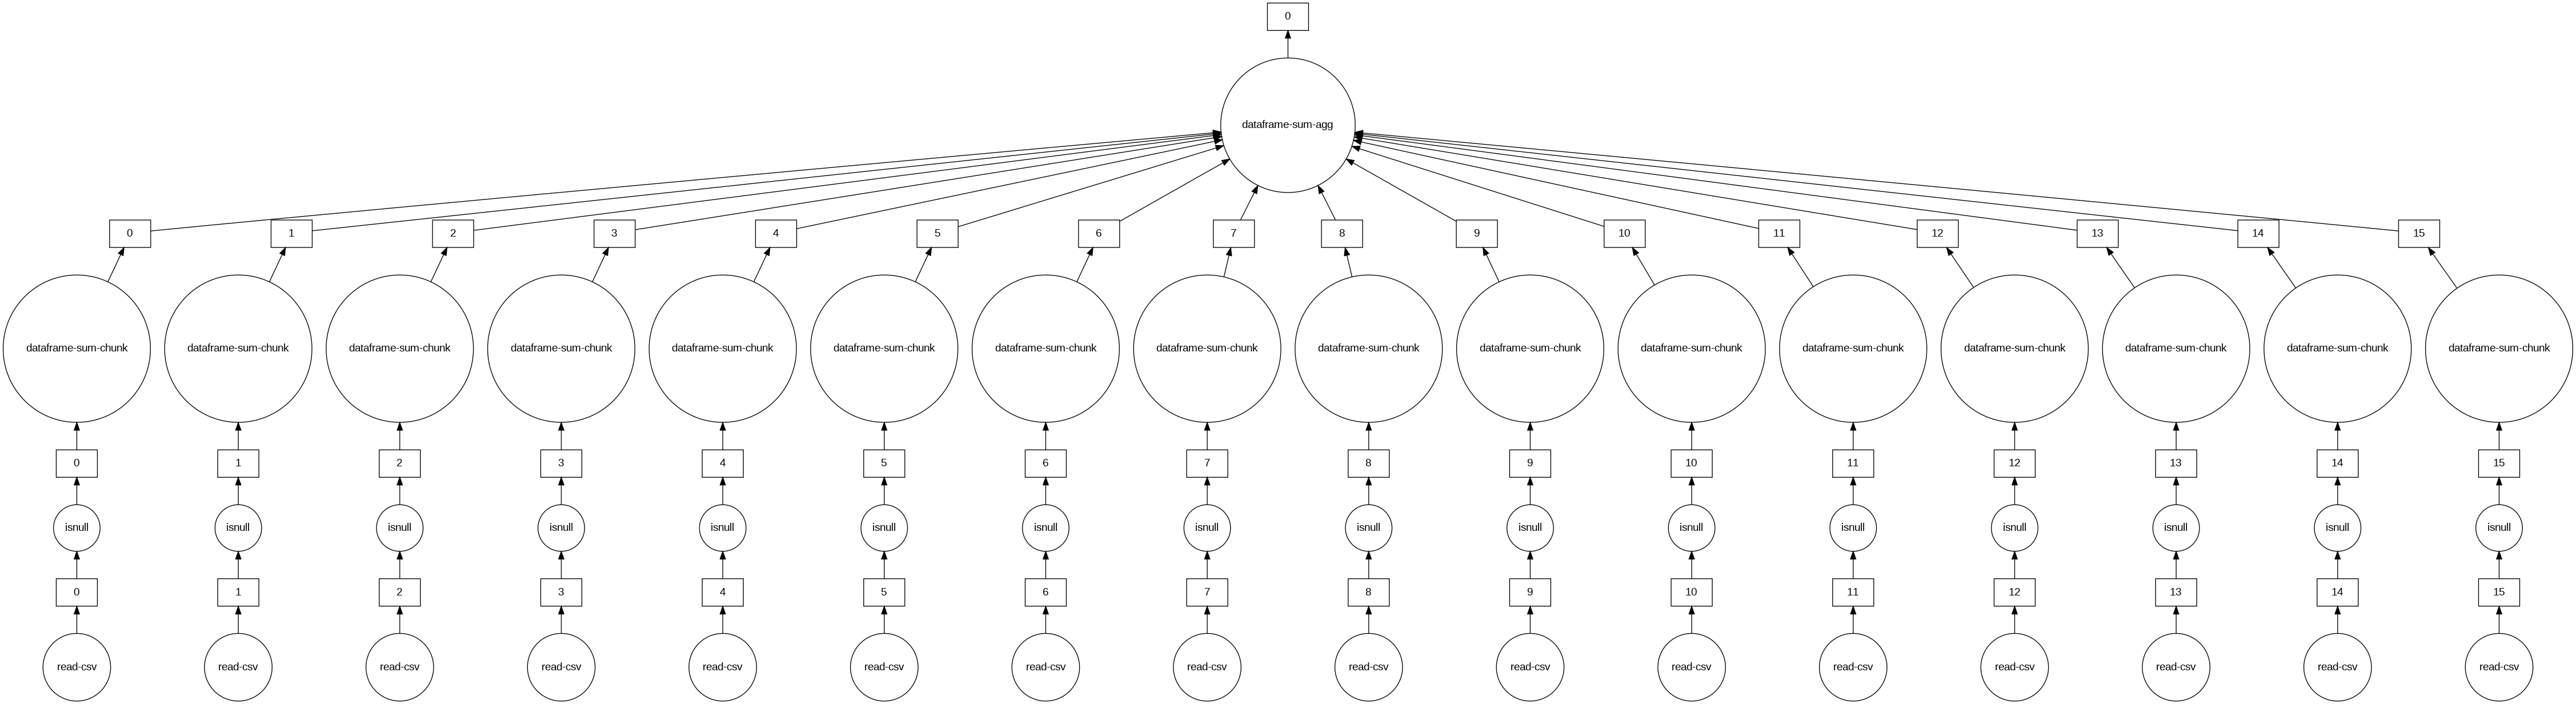

In [ ]:
missing_values.visualize()

3. What is the distribution of positive comment and negative comment?

In [ ]:
with ProgressBar():
  x = st_raw.voted_up.value_counts().compute()
x

[########################################] | 100% Completed | 70.29 s


True                                                                                           2672771
False                                                                                           394910
 however                                                                                           987
                                                                                                   673
 though                                                                                            379
                                                                                                ...   
 she made some sense and less insult; so i was suprised. Then i saw the choices i can make.          1
 she loved me as her own. Undoubtedly this was the way of the land                                   1
 she lost her leg early on to a shek                                                                 1
 she lived a life of anguish!                                            

##Pros and cons of using Dask
**Pros**:

1. **Scalability**: User used a clusters of machine instead of just a single machine to do the computation. So it is suitable to handle large datasets and performing distributed computing.

2. **Integration with Pandas and NumPy**: Users can use the similar APIs of Pandas and NumPy, so that most of the problems can be found in the internet and gain the similar solutions.

3. **Parallel Processing**: Unlike Pandas, Dask possess parallel processing capabilities, which allowed users to perform parallel computation on multi-core machines. This can significantly speed up data processing tasks.

4. **Lazy Evaluation**: Dask can build up a task graph like what we showed above before execution, this function allows users to check whether that can be modified to increase efficiency.

**Cons**:

1. **Learning Curve**: Although Dask is designed to be user-friendly, there is still some difficulties for the users who are new to this concept and to perform dask operations.

2. **Debugging Complexity**: Although Dask can have integration with Pandas and NumPy, but sometimes there also got some incompatible functions within Dask and that let the debugging being more complicated compared to Pandas.

3. **Performance Overhead**: When the data size is small, the charateristics of Dask for distributed computing will be a disadvantage since there can be overhead brought by managing this distributed computing tasks.


###Conclusion

In Conclusion, Dask is a powerful tool designed to process the data parallely and perform distributed computing tasks, it is user-friendly and can integrate with Pandas and NumPy. Inevitably, it also has some disadvantages such as there is a learning curve for new users and adding extra debugging complexity, and it is not suitable for small dataset due to performance overhead.